In [1]:
%matplotlib inline


# 1D Wasserstein barycenter demo for Unbalanced distributions


This example illustrates the computation of regularized Wassersyein Barycenter
as proposed in [10] for Unbalanced inputs.


[10] Chizat, L., Peyré, G., Schmitzer, B., & Vialard, F. X. (2016). Scaling algorithms for unbalanced transport problems. arXiv preprint arXiv:1607.05816.




In [2]:
# Author: Hicham Janati <hicham.janati@inria.fr>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot
# necessary for 3d plot even if not used
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.collections import PolyCollection

Generate data
-------------



In [3]:
# parameters

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a1 = ot.datasets.make_1D_gauss(n, m=20, s=5)  # m= mean, s= std
a2 = ot.datasets.make_1D_gauss(n, m=60, s=8)

# make unbalanced dists
a2 *= 3.

# creating matrix A containing all distributions
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

Plot data
---------



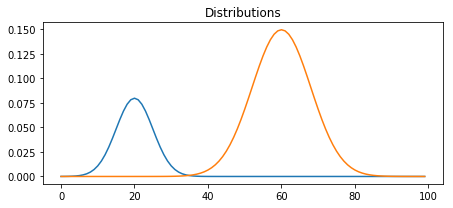

In [4]:
# plot the distributions

pl.figure(1, figsize=(6.4, 3))
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')
pl.tight_layout()

Barycenter computation
----------------------



/home/rflamary/PYTHON/POT/ot/unbalanced.py:501: RuntimeWarning: overflow encountered in square
  np.sum((v - vprev) ** 2) / np.sum((v) ** 2)
/home/rflamary/PYTHON/POT/ot/unbalanced.py:501: RuntimeWarning: invalid value encountered in double_scalars
  np.sum((v - vprev) ** 2) / np.sum((v) ** 2)


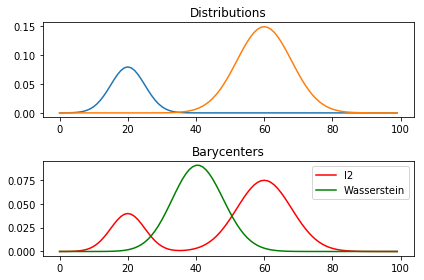

In [5]:
# non weighted barycenter computation

weight = 0.5  # 0<=weight<=1
weights = np.array([1 - weight, weight])

# l2bary
bary_l2 = A.dot(weights)

# wasserstein
reg = 1e-3
alpha = 1.

bary_wass = ot.unbalanced.barycenter_unbalanced(A, M, reg, alpha, weights)

pl.figure(2)
pl.clf()
pl.subplot(2, 1, 1)
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')

pl.subplot(2, 1, 2)
pl.plot(x, bary_l2, 'r', label='l2')
pl.plot(x, bary_wass, 'g', label='Wasserstein')
pl.legend()
pl.title('Barycenters')
pl.tight_layout()

Barycentric interpolation
-------------------------



/home/rflamary/PYTHON/POT/ot/unbalanced.py:500: RuntimeWarning: overflow encountered in square
  err = np.sum((u - uprev) ** 2) / np.sum((u) ** 2) + \
/home/rflamary/PYTHON/POT/ot/unbalanced.py:500: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sum((u - uprev) ** 2) / np.sum((u) ** 2) + \
/home/rflamary/PYTHON/POT/ot/unbalanced.py:501: RuntimeWarning: overflow encountered in square
  np.sum((v - vprev) ** 2) / np.sum((v) ** 2)
/home/rflamary/PYTHON/POT/ot/unbalanced.py:501: RuntimeWarning: invalid value encountered in double_scalars
  np.sum((v - vprev) ** 2) / np.sum((v) ** 2)


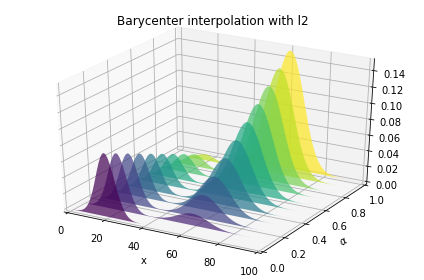

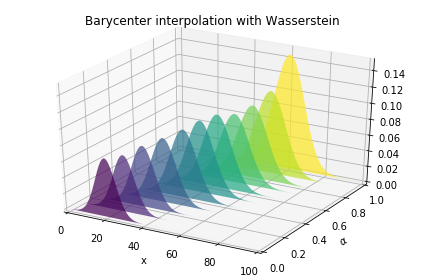

In [6]:
# barycenter interpolation

n_weight = 11
weight_list = np.linspace(0, 1, n_weight)


B_l2 = np.zeros((n, n_weight))

B_wass = np.copy(B_l2)

for i in range(0, n_weight):
    weight = weight_list[i]
    weights = np.array([1 - weight, weight])
    B_l2[:, i] = A.dot(weights)
    B_wass[:, i] = ot.unbalanced.barycenter_unbalanced(A, M, reg, alpha, weights)


# plot interpolation

pl.figure(3)

cmap = pl.cm.get_cmap('viridis')
verts = []
zs = weight_list
for i, z in enumerate(zs):
    ys = B_l2[:, i]
    verts.append(list(zip(x, ys)))

ax = pl.gcf().gca(projection='3d')

poly = PolyCollection(verts, facecolors=[cmap(a) for a in weight_list])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('x')
ax.set_xlim3d(0, n)
ax.set_ylabel(r'$\alpha$')
ax.set_ylim3d(0, 1)
ax.set_zlabel('')
ax.set_zlim3d(0, B_l2.max() * 1.01)
pl.title('Barycenter interpolation with l2')
pl.tight_layout()

pl.figure(4)
cmap = pl.cm.get_cmap('viridis')
verts = []
zs = weight_list
for i, z in enumerate(zs):
    ys = B_wass[:, i]
    verts.append(list(zip(x, ys)))

ax = pl.gcf().gca(projection='3d')

poly = PolyCollection(verts, facecolors=[cmap(a) for a in weight_list])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('x')
ax.set_xlim3d(0, n)
ax.set_ylabel(r'$\alpha$')
ax.set_ylim3d(0, 1)
ax.set_zlabel('')
ax.set_zlim3d(0, B_l2.max() * 1.01)
pl.title('Barycenter interpolation with Wasserstein')
pl.tight_layout()

pl.show()